# Dataset selection

In [68]:
pd.read_csv("../results/results_limited_15_11.csv").encoding.unique()

array(['skrub__minhash_30', 'lm__all-distilroberta-v1',
       'lm__all-mpnet-base-v2', 'openai__', 'lm__BAAI/bge-large-en-v1.5',
       'lm__llmrails/ember-v1', 'lm__thenlper/gte-large',
       'skrub__minhash_30_word_none'], dtype=object)

In [124]:
# find datasets where all ~ rest_only for all encoding methods
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np


melted_results = pd.read_csv("../results/results_limited_15_11.csv")
#TODO clean journal

melted_results["accuracy"] = melted_results["roc_auc"]
#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

# restrict to n_train = 2000
melted_results = melted_results[melted_results['n_train'] == 1000]

group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features"]
# show counts per group
print(melted_results.groupby(group_cols)['accuracy'].count().reset_index())
# assert all 7
#assert all(melted_results.groupby(group_cols)['accuracy'].count().values == 7)
print((melted_results.groupby(group_cols)['accuracy'].count().values == 7).mean())
melted_results = melted_results.groupby(group_cols)['accuracy'].mean().reset_index()
print(melted_results.shape)

df = melted_results
all_encodings = df['encoding'].unique()
# Assuming df is your DataFrame
acceptable_datasets = []
for encoding in all_encodings:
    print(encoding)
    mask_all = ((df['model'] == 'GradientBoostingClassifier') & \
            (df['encoding'] == encoding) & (df['features'] == 'all'))

    mask_rest_only = ((df['model'] == 'GradientBoostingClassifier') & \
                    (df['encoding'] == encoding) & (df['features'] == 'rest_only'))

    accuracy_all = df[mask_all]
    accuracy_rest_only = df[mask_rest_only]

    # merge
    merged = pd.merge(accuracy_all, accuracy_rest_only, on=['dataset'], suffixes=('_all', '_rest_only'))
    merged["diff"] = merged["accuracy_all"] - merged["accuracy_rest_only"]
    print(len(merged))
    print(len(merged[merged["diff"] > 0.01]["dataset"]))
    print(len(merged[merged["diff"] > 0.03]["dataset"]))
    acceptable_datasets.extend(merged[merged["diff"] > 0.01]["dataset"].tolist())


     dataset                       model dim_reduction  \
0      adult  GradientBoostingClassifier        PCA_30   
1      adult  GradientBoostingClassifier        PCA_30   
2      adult  GradientBoostingClassifier        PCA_30   
3      adult  GradientBoostingClassifier        PCA_30   
4      adult  GradientBoostingClassifier        PCA_30   
...      ...                         ...           ...   
1887  zomato          LogisticRegression   passthrough   
1888  zomato          LogisticRegression   passthrough   
1889  zomato          LogisticRegression   passthrough   
1890  zomato          LogisticRegression   passthrough   
1891  zomato          LogisticRegression   passthrough   

                         encoding   features  accuracy  
0      lm__BAAI/bge-large-en-v1.5        all         7  
1      lm__BAAI/bge-large-en-v1.5  rest_only         7  
2      lm__BAAI/bge-large-en-v1.5  text_only         7  
3        lm__all-distilroberta-v1        all         7  
4        lm__all-d

In [125]:
accuracy_all

,dataset,model,dim_reduction,encoding,features,accuracy
21,adult,GradientBoostingClassifier,passthrough,skrub__minhash_30_word_none,all,0.894570
87,beer_profile_and_ratings,GradientBoostingClassifier,passthrough,skrub__minhash_30_word_none,all,0.762082
153,bikewale,GradientBoostingClassifier,passthrough,skrub__minhash_30_word_none,all,0.930079
219,building_permits,GradientBoostingClassifier,passthrough,skrub__minhash_30_word_none,all,0.948250
285,clear_corpus,GradientBoostingClassifier,passthrough,skrub__minhash_30_word_none,all,0.842006
351,coffee_analysis,GradientBoostingClassifier,passthrough,skrub__minhash_30_word_none,all,NaN
417,coffee_fix,GradientBoostingClassifier,passthrough,skrub__minhash_30_word_none,all,NaN
483,company_employees,GradientBoostingClassifier,passthrough,skrub__minhash_30_word_none,all,0.545380
549,employee-remuneration-and-expenses-earning-ove...,GradientBoostingClassifier,passthrough,skrub__minhash_30_word_none,all,0.836861
615,employee_salary,GradientBoostingClassifier,passthrough,skrub__minhash_30_word_none,all,0.971772


In [126]:
len(np.unique(acceptable_datasets))

17

In [1]:
335141888 / 1e6

335.141888

# Language models improve upond substring methods

In [97]:
melted_results = pd.read_csv("../results/results_limited_fixed_15_11.csv")
#melted_results = pd.read_csv("../results/results_all_limited_13_11.csv")

melted_results["accuracy"] = melted_results["roc_auc"]
#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

# restrict to n_train = 2000
melted_results = melted_results[melted_results['n_train'] == 1000]
# features = text_only
#melted_results = melted_results[melted_results['features'] == 'all']
# model = "GradientBoostingClassifier"
#melted_results = melted_results[melted_results["model"] == "GradientBoostingClassifier"]

acceptable_datasets = ['bikewale', 'clear_corpus', 'company_employees',
       'employee-remuneration-and-expenses-earning-over-75000',
       'employee_salary', 'goodreads', 'journal_jcr_cls', 'ramen_ratings',
       'spotify', 'us_accidents_counts', 'us_accidents_severity',
       'us_presidential', 'wine_review', 'zomato']
melted_results = melted_results[melted_results["dataset"].isin(acceptable_datasets)]

melted_results = melted_results[melted_results["encoding"].isin(["openai__", "skrub__minhash_30", "lm__BAAI/bge-large-en-v1.5"])]

group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features", "n_train"]
# show counts per group
print(melted_results.groupby(group_cols)['accuracy'].count().reset_index())
# assert all 7

#melted_results["accuracy"] = melted_results.groupby(["dataset", "features", "n_train"])["accuracy"].transform(
    #lambda x: (x - x.min()) / (x.max() - x.min())
#)
print((melted_results.groupby(group_cols)['accuracy'].count().values == 7).mean())
melted_results = melted_results.groupby(group_cols)['accuracy'].mean().reset_index()
print(melted_results.shape)

px.strip(
    melted_results,
    y = "dataset",
    x = "accuracy",
    color="encoding",
    hover_data=melted_results.columns,
    height=1500
)


      dataset                       model dim_reduction  \
0    bikewale  GradientBoostingClassifier        PCA_30   
1    bikewale  GradientBoostingClassifier        PCA_30   
2    bikewale  GradientBoostingClassifier        PCA_30   
3    bikewale  GradientBoostingClassifier        PCA_30   
4    bikewale  GradientBoostingClassifier   passthrough   
..        ...                         ...           ...   
219    zomato          LogisticRegression   passthrough   
220    zomato          LogisticRegression   passthrough   
221    zomato          LogisticRegression   passthrough   
222    zomato          LogisticRegression   passthrough   
223    zomato          LogisticRegression   passthrough   

                       encoding   features  n_train  accuracy  
0    lm__BAAI/bge-large-en-v1.5        all     1000         7  
1    lm__BAAI/bge-large-en-v1.5  text_only     1000         7  
2                      openai__        all     1000         7  
3                      openai__  te

In [127]:
# find datasets where all ~ rest_only for all encoding methods
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np


melted_results = pd.read_csv("../results/results_limited_fixed_15_11.csv")

melted_results["accuracy"] = melted_results["roc_auc"]
#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

# restrict to n_train = 2000
#melted_results = melted_results[melted_results['n_train'] == 1000]

acceptable_datasets = ['bikewale', 'clear_corpus', 'company_employees',
       'employee-remuneration-and-expenses-earning-over-75000',
       'employee_salary', 'goodreads', 'journal_jcr_cls', 'ramen_ratings',
       'spotify', 'us_accidents_counts', 'us_accidents_severity',
       'us_presidential', 'wine_review', 'zomato']
melted_results = melted_results[melted_results["dataset"].isin(acceptable_datasets)]

melted_results = melted_results[melted_results["encoding"].isin(["openai__", "skrub__minhash_30", "lm__BAAI/bge-large-en-v1.5"])]


#melted_results = melted_results[melted_results["encoding"] != "skrub__minhash_30_word_none"]

group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features", "n_train"]
# show counts per group
print(melted_results.groupby(group_cols)['accuracy'].count().reset_index())
# assert all 7
print(np.mean(melted_results.groupby(group_cols)['accuracy'].count().values == 7))

#melted_results["accuracy"] = melted_results.groupby(["dataset", "features", "n_train"])["accuracy"].transform(
    #lambda x: (x - x.min()) / (x.max() - x.min())
#)
print((melted_results.groupby(group_cols)['accuracy'].count().values == 7).mean())
melted_results = melted_results.groupby(group_cols)['accuracy'].mean().reset_index()
print(melted_results.shape)


       dataset                       model dim_reduction  \
0     bikewale  GradientBoostingClassifier        PCA_30   
1     bikewale  GradientBoostingClassifier        PCA_30   
2     bikewale  GradientBoostingClassifier        PCA_30   
3     bikewale  GradientBoostingClassifier        PCA_30   
4     bikewale  GradientBoostingClassifier        PCA_30   
...        ...                         ...           ...   
1131    zomato          LogisticRegression   passthrough   
1132    zomato          LogisticRegression   passthrough   
1133    zomato          LogisticRegression   passthrough   
1134    zomato          LogisticRegression   passthrough   
1135    zomato          LogisticRegression   passthrough   

                        encoding   features  n_train  accuracy  
0     lm__BAAI/bge-large-en-v1.5        all      500         7  
1     lm__BAAI/bge-large-en-v1.5        all     1000         7  
2     lm__BAAI/bge-large-en-v1.5        all     2000         7  
3     lm__BAAI/bge-

In [130]:
#features = "all"
model = "GradientBoostingClassifier"
#to_plot = melted_results[(melted_results["features"] == features) & (melted_results["model"] == model)]
to_plot = melted_results[(melted_results["model"] == model)]
# filter for dataset in 

# filter for encoding in ["lm__BAAI/bge-large-en-v1.5", "openai__", "skrub__minhash_30"]
#to_plot = to_plot[to_plot["encoding"].isin(["lm__BAAI/bge-large-en-v1.5", "openai__", "skrub__minhash_30"])]
print(to_plot.groupby(["dataset", "n_train", "features"], sort=False)["accuracy"].count())
# compute rank
to_plot["rank"] = to_plot.groupby(["dataset", "n_train"])["accuracy"].rank(ascending=False)
# compute normalized accuracy


dataset   n_train  features 
bikewale  500      all          3
          1000     all          3
          2000     all          3
          3000     all          3
          4000     all          3
                               ..
zomato    1000     text_only    3
          2000     text_only    3
          3000     text_only    3
          4000     text_only    3
          5000     text_only    3
Name: accuracy, Length: 142, dtype: int64


/var/folders/fy/__8z8cpn6gs04465sq9g1nq80000gn/T/ipykernel_26925/1936763851.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:14

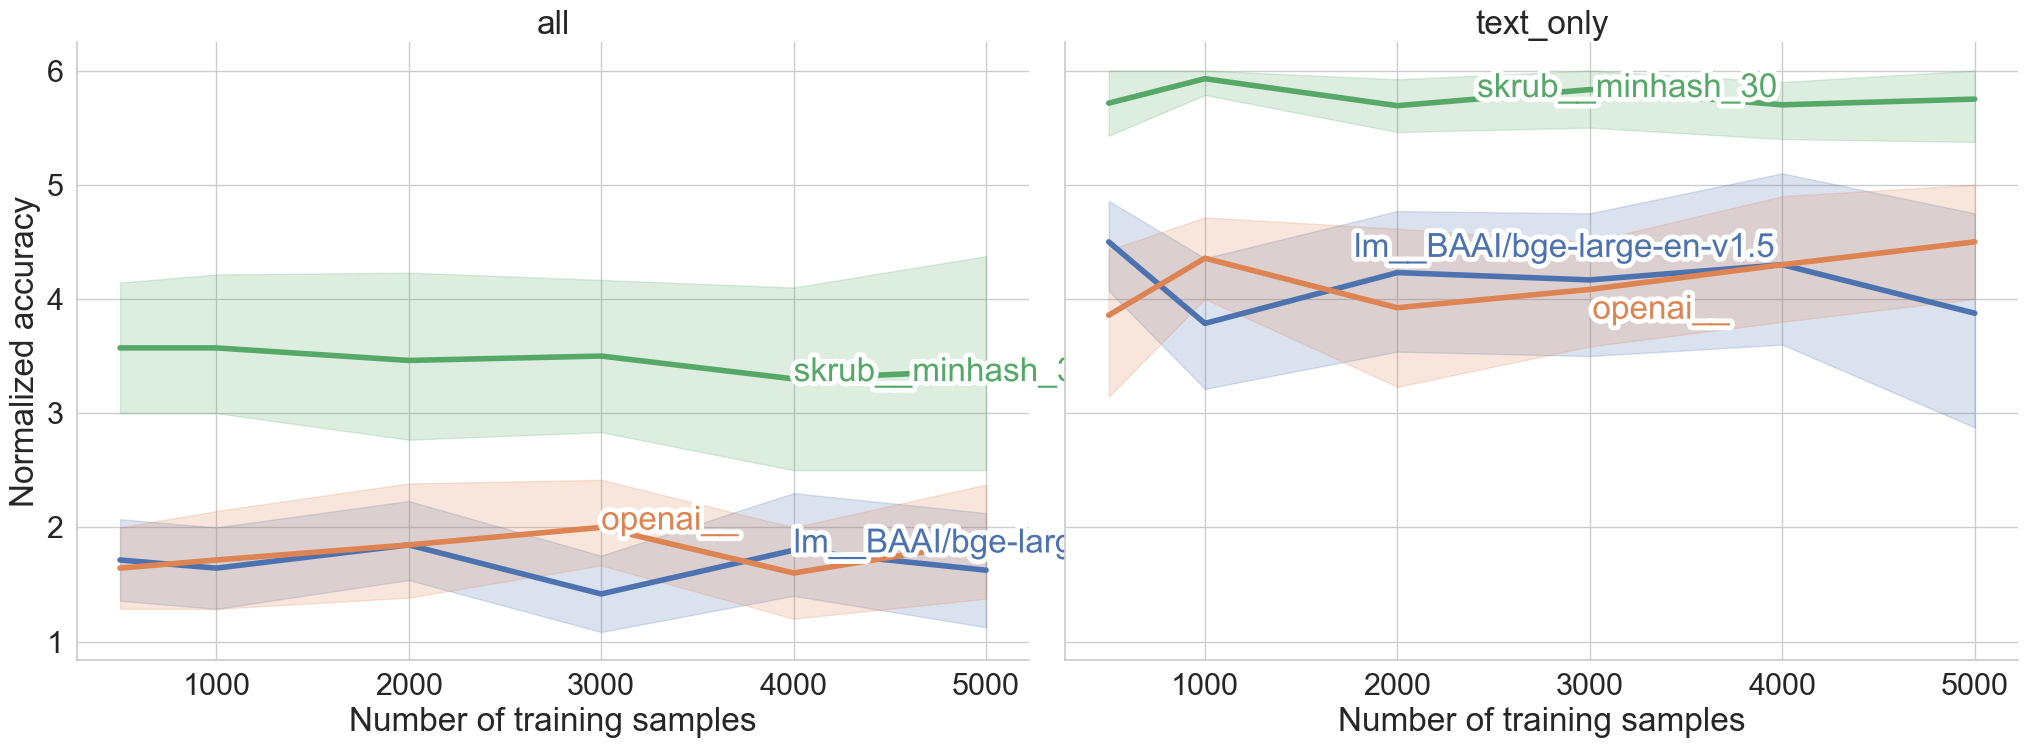

In [131]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
sns.set(style="whitegrid", font_scale=2)

# Create the lineplot
#ax = sns.lineplot(data=df, x="n_train", y="accuracies", hue="encoding", style="features", linewidth=4)
# Define a FacetGrid by 'features'
# Define a FacetGrid by 'features'

g = sns.FacetGrid(to_plot, col="features", height=8, aspect=1.3)

# Create lineplot on the FacetGrid
g.map_dataframe(sns.lineplot, x="n_train", y="rank", hue="encoding", linewidth=4)
g.set_titles(col_template="{col_name}")

# Prepare to annotate the lines with adjustText
for ax, feature in zip(g.axes.flatten(), to_plot['features'].unique()):
    lines = ax.lines
    texts = []
    for i, (model, line) in enumerate(zip(to_plot['encoding'].unique(), lines)):
        index = -2 - (i % 2)
        x_last = line.get_xdata()[index] + 0.1
        y_last = line.get_ydata()[index] - 0.02

        text = ax.text(x_last, y_last, model, color=line.get_color())
        text.set_path_effects([PathEffects.withStroke(linewidth=7, foreground='white')])
        texts.append(text)

# Adjust the text labels
adjust_text(texts)

# Set labels and title
g.set_axis_labels("Number of training samples", "Normalized accuracy")

/var/folders/fy/__8z8cpn6gs04465sq9g1nq80000gn/T/ipykernel_26925/4204996071.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fy/__8z8cpn6gs04465sq9g1nq80000gn/T/ipykernel_26925/4204996071.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fy/__8z8cpn6gs04465sq9g1nq80000gn/T/ipykernel_26925/4204996071.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

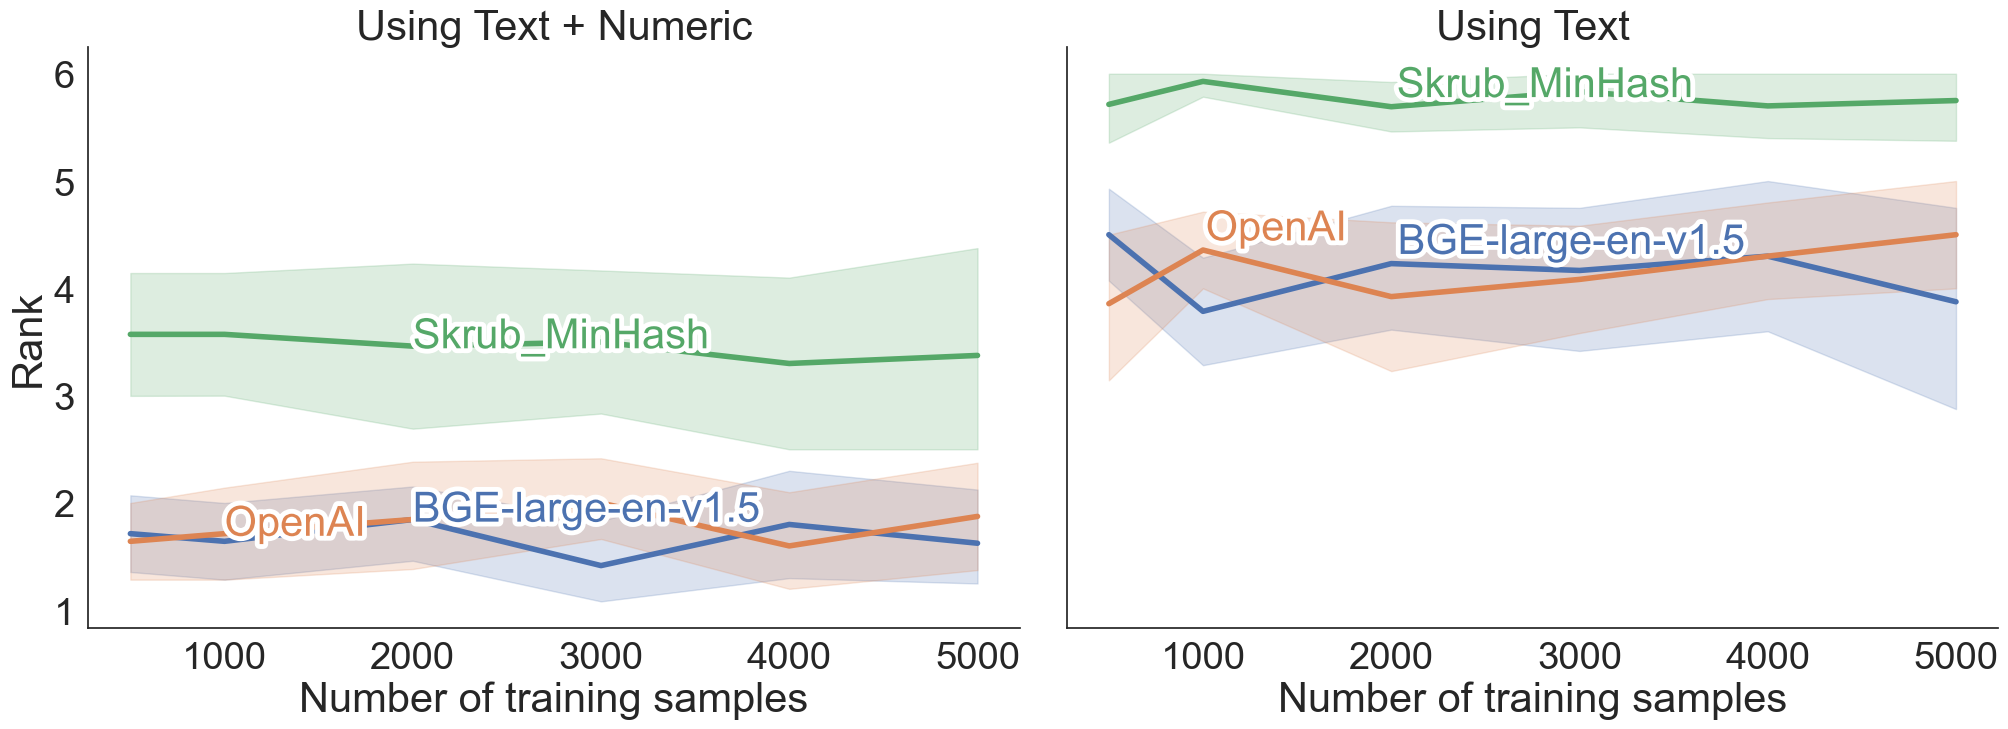

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects


to_plot['encoding'] = to_plot['encoding'].replace('skrub__minhash_30', 'Skrub_MinHash')
to_plot['encoding'] = to_plot['encoding'].replace('openai__', 'OpenAI')
to_plot['encoding'] = to_plot['encoding'].replace('lm__BAAI/bge-large-en-v1.5', 'BGE-large-en-v1.5')
to_plot['features'] = to_plot['features'].replace('all', 'Using Text + Numeric')
to_plot['features'] = to_plot['features'].replace('rest_only', 'Using Numeric')
to_plot['features'] = to_plot['features'].replace('text_only', 'Using Text')

# Set the style and scale of the plot
sns.set(style="white", font_scale=2.5, rc={'font.family':'Arial, monospace'})

# Create the FacetGrid
g = sns.FacetGrid(to_plot, col="features", height=8, aspect=1.3)

# Create lineplot on the FacetGrid
g.map_dataframe(sns.lineplot, x="n_train", y="rank", hue="encoding", linewidth=4)
g.set_titles(col_template="{col_name}")

# Prepare to annotate the lines with adjustText
for ax, feature in zip(g.axes.flatten(), to_plot['features'].unique()):
    lines = ax.lines
    texts = []
    for i, (model, line) in enumerate(zip(to_plot['encoding'].unique(), lines)):
        index = -4 - (i % 2)
        x_last = line.get_xdata()[index] + 0.1
        y_last = line.get_ydata()[index] - 0.02

        text = ax.text(x_last, y_last, model, color=line.get_color())
        text.set_path_effects([PathEffects.withStroke(linewidth=7, foreground='white')])
        texts.append(text)

# Adjust the text labels
adjust_text(texts)

# Set labels and title
g.set_axis_labels("Number of training samples", "Rank")

# Remove the top and right spines from plot
sns.despine()

# Show the plot
plt.show()

# save to pdf
g.savefig("../figures/mean_rank.pdf")

In [153]:
datasets = ["journal_jcr_cls", "movies", "michelin", "spotify", "employee_salary", "museums", "fifa_footballplayers_22", "jp_anime", "clear_corpus", "company_employees", "us_presidential", "us_accidents_severity", "us_accidents_counts", "wine_review"]
datasets.extend(["building_permits", "public", "kickstarter", "colleges", "medical_charge", "traffic_violations"]) #  "agora"
datasets.extend(["bikewale", "goodreads", "zomato", "nfl_contract", "employee-remuneration-and-expenses-earning-over-75000", "ramen_ratings", "beer_profile_and_ratings", "adult"])

In [157]:
import numpy as np
np.sort(datasets)

array(['adult', 'beer_profile_and_ratings', 'bikewale',
       'building_permits', 'clear_corpus', 'colleges',
       'company_employees',
       'employee-remuneration-and-expenses-earning-over-75000',
       'employee_salary', 'fifa_footballplayers_22', 'goodreads',
       'journal_jcr_cls', 'jp_anime', 'kickstarter', 'medical_charge',
       'michelin', 'movies', 'museums', 'nfl_contract', 'public',
       'ramen_ratings', 'spotify', 'traffic_violations',
       'us_accidents_counts', 'us_accidents_severity', 'us_presidential',
       'wine_review', 'zomato'], dtype='<U53')

# PCA 100

In [150]:
# find datasets where all ~ rest_only for all encoding methods
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np


melted_results = pd.concat([pd.read_csv("../results/results_limited_fixed_15_11.csv"),
                            pd.read_csv("../results/results_limited_fixed_15_11_100.csv")])

#TODO clean journal

melted_results["accuracy"] = melted_results["roc_auc"]
#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

# restrict to n_train = 2000
melted_results = melted_results[melted_results['n_train'] == 2000]

group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features"]
# show counts per group
print(melted_results.groupby(group_cols)['accuracy'].count().reset_index())
# assert all 7
#assert all(melted_results.groupby(group_cols)['accuracy'].count().values == 7)
print((melted_results.groupby(group_cols)['accuracy'].count().values == 7).mean())
melted_results = melted_results.groupby(group_cols)['accuracy'].mean().reset_index()
print(melted_results.shape)

# filter model == gradientboostingclassifier
melted_results = melted_results[melted_results["model"] == "GradientBoostingClassifier"]

px.strip(
    melted_results,
    y = "dataset",
    x = "accuracy",
    facet_row="features",
    color="dim_reduction",
    hover_data = melted_results.columns,
    height=1500,
)


      dataset                       model dim_reduction  \
0    bikewale  GradientBoostingClassifier       PCA_100   
1    bikewale  GradientBoostingClassifier       PCA_100   
2    bikewale  GradientBoostingClassifier       PCA_100   
3    bikewale  GradientBoostingClassifier       PCA_100   
4    bikewale  GradientBoostingClassifier       PCA_100   
..        ...                         ...           ...   
723    zomato          LogisticRegression   passthrough   
724    zomato          LogisticRegression   passthrough   
725    zomato          LogisticRegression   passthrough   
726    zomato          LogisticRegression   passthrough   
727    zomato          LogisticRegression   passthrough   

                        encoding   features  accuracy  
0     lm__BAAI/bge-large-en-v1.5        all         7  
1     lm__BAAI/bge-large-en-v1.5  text_only         7  
2          lm__llmrails/ember-v1        all         7  
3          lm__llmrails/ember-v1  text_only         7  
4          

In [140]:
melted_results

,dataset,model,dim_reduction,encoding,features,accuracy
0,bikewale,GradientBoostingClassifier,PCA_30,lm__BAAI/bge-large-en-v1.5,all,0.936869
1,bikewale,GradientBoostingClassifier,PCA_30,lm__BAAI/bge-large-en-v1.5,text_only,0.842087
2,bikewale,GradientBoostingClassifier,PCA_30,lm__all-distilroberta-v1,all,0.935742
3,bikewale,GradientBoostingClassifier,PCA_30,lm__all-distilroberta-v1,text_only,0.839573
4,bikewale,GradientBoostingClassifier,PCA_30,lm__all-mpnet-base-v2,all,0.937789
...,...,...,...,...,...,...
611,zomato,LogisticRegression,passthrough,openai__,text_only,0.838624
612,zomato,LogisticRegression,passthrough,skrub__minhash_30,all,0.776519
613,zomato,LogisticRegression,passthrough,skrub__minhash_30,text_only,0.777778
614,zomato,LogisticRegression,passthrough,skrub__minhash_30_word_none,all,0.847167


# Model comparison

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np


melted_results = pd.read_csv("../results/results_all_15_11.csv")
features = "all"
model = "GradientBoostingClassifier"
n_train = 1000
to_plot = melted_results[(melted_results["features"] == features) & (melted_results["model"] == model) & (melted_results["n_train"] == n_train)]
acceptable_datasets = ['bikewale', 'clear_corpus', 'company_employees',
       'employee-remuneration-and-expenses-earning-over-75000',
       'employee_salary', 'goodreads', 'journal_jcr_cls', 'ramen_ratings',
       'spotify', 'us_accidents_counts', 'us_accidents_severity',
       'us_presidential', 'wine_review', 'zomato']
to_plot = to_plot[to_plot["dataset"].isin(acceptable_datasets)]

to_plot = to_plot[to_plot['encoding'] != 'lm__Hum-Works/lodestone-base-4096-v1']
to_plot = to_plot[to_plot['encoding'] != 'lm__gtr-t5-large']

In [31]:
to_plot = to_plot[["encoding", "dataset", "roc_auc"]]

# average roc_auc for a given encoding and dataset
to_plot = to_plot.groupby(["encoding", "dataset"]).mean().reset_index()

In [32]:
to_plot

,encoding,dataset,roc_auc
0,lm__BAAI/bge-large-en-v1.5,bikewale,0.936811
1,lm__BAAI/bge-large-en-v1.5,clear_corpus,0.862371
2,lm__BAAI/bge-large-en-v1.5,company_employees,0.638824
3,lm__BAAI/bge-large-en-v1.5,employee-remuneration-and-expenses-earning-ove...,0.865958
4,lm__BAAI/bge-large-en-v1.5,employee_salary,0.972536
...,...,...,...
450,skrub__minhash_30_word_none,spotify,0.842239
451,skrub__minhash_30_word_none,us_accidents_counts,0.625238
452,skrub__minhash_30_word_none,us_accidents_severity,0.731040
453,skrub__minhash_30_word_none,wine_review,0.817408


In [39]:
from critdd import Diagram
import pandas as pd
# download example data
df = to_plot.pivot(
    index = "dataset",
    columns = "encoding",
    values = "roc_auc"
)

# create a CD diagram from the Pandas DataFrame
diagram = Diagram(
    df.to_numpy(),
    treatment_names = df.columns,
    maximize_outcome = True
)

# inspect average ranks and groups of statistically indistinguishable treatments
diagram.average_ranks # the average rank of each treatment
diagram.get_groups(alpha=.05, adjustment="holm")

# export the diagram to a file
diagram.to_file(
    "critdd_all_models.pdf",
    alpha = .05,
    adjustment = "holm",
    reverse_x = True,
    axis_options = {"title": "critdd"},
)

In [37]:
df

encoding,lm__BAAI/bge-large-en-v1.5,lm__BAAI/bge-small-en-v1.5,lm__TaylorAI/bge-micro,lm__TaylorAI/bge-micro-v2,lm__TaylorAI/gte-tiny,lm__all-MiniLM-L12-v2,lm__all-MiniLM-L6-v2,lm__all-distilroberta-v1,lm__all-mpnet-base-v2,lm__gtr-t5-base,...,lm__paraphrase-multilingual-MiniLM-L12-v2,lm__paraphrase-multilingual-mpnet-base-v2,lm__sentence-t5-base,lm__sentence-t5-large,lm__thenlper/gte-base,lm__thenlper/gte-large,lm__thenlper/gte-small,openai__,skrub__minhash_30,skrub__minhash_30_word_none
dataset,,,,,,,,,,,,,,,,,,,,,
bikewale,0.936811,0.937526,0.939355,0.936534,0.939435,0.938383,0.936023,0.935243,0.937734,0.935141,...,0.937512,0.937764,0.937958,0.940910,0.935862,0.939938,0.938367,0.939903,0.940432,0.929820
clear_corpus,0.862371,0.853914,0.855285,0.859728,0.863524,0.856250,0.856598,0.859154,0.859078,0.855534,...,0.853799,0.856164,0.858116,0.857712,0.861455,0.860173,0.858801,0.859219,0.844339,0.842969
company_employees,0.638824,0.596696,0.574088,0.579042,0.589956,0.591742,0.585337,0.583996,0.626279,0.590813,...,0.565701,0.569582,0.591932,0.609757,0.603145,0.618803,0.586771,0.624583,0.586179,0.544613
employee-remuneration-and-expenses-earning-over-75000,0.865958,0.868377,0.860702,0.863780,0.868282,0.859672,0.861012,0.860050,0.861891,0.860880,...,0.851529,0.850916,0.858585,0.855675,0.869603,0.867566,0.868107,0.859940,0.841362,0.835573
employee_salary,0.972536,0.973214,0.971762,0.972389,0.972210,0.969977,0.971518,0.971115,0.972337,0.973442,...,0.970271,0.971224,0.970208,0.969747,0.972221,0.972474,0.973083,0.972212,0.970749,0.971829
goodreads,0.653792,0.672501,0.674601,0.673232,0.673560,0.644530,0.664692,0.674729,0.669938,0.644298,...,0.651300,0.660081,0.666044,0.675214,0.658695,0.659202,0.668646,0.689707,0.639646,0.640162
journal_jcr_cls,0.633640,0.624584,0.617013,0.616628,0.615308,0.609227,0.624460,0.584830,0.607559,0.590009,...,0.594357,0.588107,0.602424,0.619166,0.620214,0.629417,0.630126,0.632322,0.598154,0.562057
ramen_ratings,0.700268,0.696178,0.690853,0.679086,0.693609,0.693012,0.710970,0.697151,0.696227,0.707491,...,0.696542,0.699597,0.695537,0.707305,0.700179,0.706739,0.699474,0.699377,0.687738,0.689177
spotify,0.939510,0.922961,0.915851,0.917852,0.919357,0.926207,0.918761,0.925143,0.933955,0.932352,...,0.895343,0.906662,0.936826,0.942079,0.928589,0.935835,0.926117,0.943997,0.871518,0.842239


In [24]:
_URL = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/example.csv"
pd.read_csv(_URL)

,classifier_name,dataset_name,accuracy
0,clf3,dataset1,0.819780
1,clf3,dataset2,0.803069
2,clf3,dataset3,0.840000
3,clf3,dataset4,0.700000
4,clf3,dataset5,0.850000
...,...,...,...
70,clf2,dataset11,0.928571
71,clf2,dataset12,0.596000
72,clf2,dataset13,0.620513
73,clf2,dataset14,0.658974


In [35]:
from critdd import Diagram
import pandas as pd

# download example data
_URL = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/example.csv"
df = pd.read_csv(_URL).pivot(
    index = "dataset_name",
    columns = "classifier_name",
    values = "accuracy"
)

# create a CD diagram from the Pandas DataFrame
diagram = Diagram(
    df.to_numpy(),
    treatment_names = df.columns,
    maximize_outcome = True
)

# inspect average ranks and groups of statistically indistinguishable treatments
diagram.average_ranks # the average rank of each treatment
diagram.get_groups(alpha=.1, adjustment="holm")

# export the diagram to a file
diagram.to_file(
    "example.pdf",
    alpha = .05,
    adjustment = "holm",
    reverse_x = True,
    axis_options = {"title": "critdd"},
)

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [27]:
df

classifier_name,clf1,clf2,clf3,clf4,clf5
dataset_name,,,,,
dataset1,0.690110,0.523077,0.819780,0.483516,0.454945
dataset10,0.901449,0.266667,0.864493,0.848551,0.837681
dataset11,0.535714,0.928571,1.000000,1.000000,1.000000
dataset12,0.592000,0.596000,0.772000,0.576000,0.820000
dataset13,0.664103,0.620513,0.841026,0.589744,0.794872
dataset14,0.584615,0.658974,0.838462,0.597436,0.766667
dataset15,0.638462,0.612821,0.858974,0.630769,0.802564
dataset2,0.017903,0.406650,0.803069,0.414322,0.838875
dataset3,0.302857,0.662857,0.840000,0.794286,0.822857


In [6]:
to_plot

NameError: name 'to_plot' is not defined

In [ ]:
from critdd import Diagram
to_
diagram = Diagram(
    df_for_critdd.to_numpy(),
    treatment_names = df_for_critdd.columns,
    maximize_outcome = True
)
diagram.average_ranks # the average rank of each treatment
#diagram.get_groups(alpha=.05, adjustment="holm")

# plot the diagram
diagram.to_file(
    f"all_datasets_{num_train}.svg",
    alpha = .05,
    adjustment = "holm",
    reverse_x = True,
    axis_options = {"title": "critdd"},
)

# Varying dimensions

      dataset                       model dim_reduction  \
0    bikewale  GradientBoostingClassifier       PCA_100   
1    bikewale  GradientBoostingClassifier       PCA_100   
2    bikewale  GradientBoostingClassifier       PCA_100   
3    bikewale  GradientBoostingClassifier       PCA_200   
4    bikewale  GradientBoostingClassifier       PCA_200   
..        ...                         ...           ...   
183    zomato  GradientBoostingClassifier        PCA_30   
184    zomato  GradientBoostingClassifier        PCA_60   
185    zomato  GradientBoostingClassifier        PCA_60   
186    zomato  GradientBoostingClassifier        PCA_60   
187    zomato  GradientBoostingClassifier        PCA_60   

                       encoding   features  n_train  accuracy  
0    lm__BAAI/bge-large-en-v1.5        all     3000         7  
1                      openai__        all     3000         7  
2                      openai__  text_only     3000         7  
3    lm__BAAI/bge-large-en-v1.5    

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

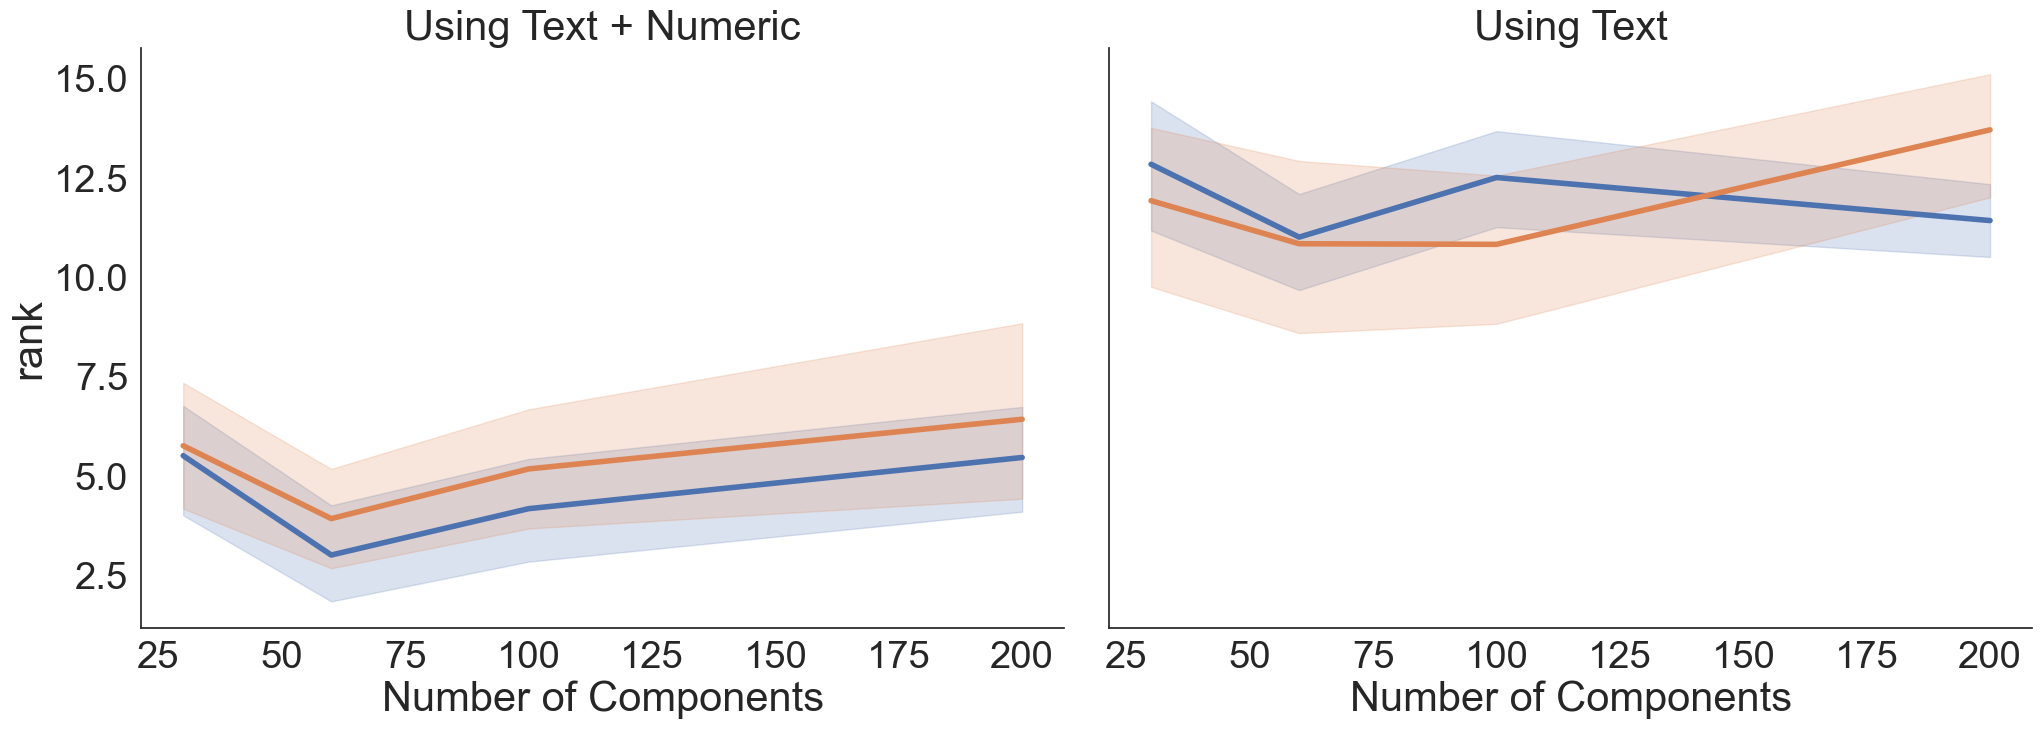

In [10]:
# find datasets where all ~ rest_only for all encoding methods
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np


melted_results = pd.read_csv("../results/results_limited_fixed_15_11_varying_dim.csv")

melted_results["accuracy"] = melted_results["roc_auc"]
#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

# restrict to n_train = 2000
melted_results = melted_results[melted_results['n_train'] == 3000]


acceptable_datasets = ['bikewale', 'clear_corpus', 'company_employees',
       'employee-remuneration-and-expenses-earning-over-75000',
       'employee_salary', 'goodreads', 'journal_jcr_cls', 'ramen_ratings',
       'spotify', 'us_accidents_counts', 'us_accidents_severity',
       'us_presidential', 'wine_review', 'zomato']
melted_results = melted_results[melted_results["dataset"].isin(acceptable_datasets)]

melted_results = melted_results[melted_results["encoding"].isin(["openai__", "skrub__minhash_30", "lm__BAAI/bge-large-en-v1.5"])]


#melted_results = melted_results[melted_results["encoding"] != "skrub__minhash_30_word_none"]

group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features", "n_train"]
# show counts per group
print(melted_results.groupby(group_cols)['accuracy'].count().reset_index())
# assert all 7
print(np.mean(melted_results.groupby(group_cols)['accuracy'].count().values == 7))

#melted_results["accuracy"] = melted_results.groupby(["dataset", "features", "n_train"])["accuracy"].transform(
    #lambda x: (x - x.min()) / (x.max() - x.min())
#)
print((melted_results.groupby(group_cols)['accuracy'].count().values == 7).mean())
melted_results = melted_results.groupby(group_cols)['accuracy'].mean().reset_index()
print(melted_results.shape)

#features = "all"
model = "GradientBoostingClassifier"
#to_plot = melted_results[(melted_results["features"] == features) & (melted_results["model"] == model)]
to_plot = melted_results[(melted_results["model"] == model)]
# filter for dataset in 

# filter for encoding in ["lm__BAAI/bge-large-en-v1.5", "openai__", "skrub__minhash_30"]
#to_plot = to_plot[to_plot["encoding"].isin(["lm__BAAI/bge-large-en-v1.5", "openai__", "skrub__minhash_30"])]
print(to_plot.groupby(["dataset", "n_train", "features"], sort=False)["accuracy"].count())
# compute rank
to_plot["rank"] = to_plot.groupby(["dataset", "n_train"])["accuracy"].rank(ascending=False)
# compute normalized accuracy

import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects


to_plot['encoding'] = to_plot['encoding'].replace('skrub__minhash_30', 'Skrub_MinHash')
to_plot['encoding'] = to_plot['encoding'].replace('openai__', 'OpenAI')
to_plot['encoding'] = to_plot['encoding'].replace('lm__BAAI/bge-large-en-v1.5', 'BGE-large-en-v1.5')
to_plot['features'] = to_plot['features'].replace('all', 'Using Text + Numeric')
to_plot['features'] = to_plot['features'].replace('rest_only', 'Using Numeric')
to_plot['features'] = to_plot['features'].replace('text_only', 'Using Text')

# Extract Number of components from dim_reduction ("PCA_30", "PCA_60" etc.)
to_plot["Number of Components"] = to_plot["dim_reduction"].str.split("_").str[1].astype(int)

# Set the style and scale of the plot
sns.set(style="white", font_scale=2.5, rc={'font.family':'Arial, monospace'})

# Create the FacetGrid
g = sns.FacetGrid(to_plot, col="features", height=8, aspect=1.3)

# # Create lineplot on the FacetGrid
g.map_dataframe(sns.lineplot, x="Number of Components", y="rank", hue="encoding", linewidth=4)
g.set_titles(col_template="{col_name}")

# # Prepare to annotate the lines with adjustText
# for ax, feature in zip(g.axes.flatten(), to_plot['features'].unique()):
#     lines = ax.lines
#     texts = []
#     for i, (model, line) in enumerate(zip(to_plot['encoding'].unique(), lines)):
#         index = -4 - (i % 2)
#         x_last = line.get_xdata()[index] + 0.1
#         y_last = line.get_ydata()[index] - 0.02

#         text = ax.text(x_last, y_last, model, color=line.get_color())
#         text.set_path_effects([PathEffects.withStroke(linewidth=7, foreground='white')])
#         texts.append(text)

# # Adjust the text labels
# adjust_text(texts)

# # Set labels and title
# g.set_axis_labels("Number of training samples", "Rank")

# # Remove the top and right spines from plot
# sns.despine()

# Show the plot
plt.show()

# save to pdf
#g.savefig("../figures/mean_rank.pdf")

# Stacking/Ensembling

In [27]:
melted_results = pd.read_csv("../results/results_ensemble_18_11.csv")
# concatenate  with pd.read_csv("../results/results_limited_fixed_15_11.csv")
melted_results = pd.concat([melted_results,  pd.read_csv("../results/results_limited_fixed_15_11.csv")])
melted_results["accuracy"] = melted_results["roc_auc"]
melted_results['enc_model'] = melted_results['enc_model'].fillna('unknown')
melted_results['model'] = melted_results['model'].fillna('unknown')

#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

# restrict to n_train = 2000
melted_results = melted_results[melted_results['n_train'] == 2000]
# restrict to features = all
melted_results = melted_results[melted_results['features'] == "all"]



group_cols = ['dataset', 'enc_model', "model", 'dim_reduction', 'encoding', "features", "n_train"]
# show counts per group
print(melted_results.groupby(group_cols)['accuracy'].count().reset_index())
# assert all 7
print(np.mean(melted_results.groupby(group_cols)['accuracy'].count().values == 7))

#melted_results["accuracy"] = melted_results.groupby(["dataset", "features", "n_train"])["accuracy"].transform(
    #lambda x: (x - x.min()) / (x.max() - x.min())
#)
print((melted_results.groupby(group_cols)['accuracy'].count().values == 7).mean())
melted_results = melted_results.groupby(group_cols)['accuracy'].mean().reset_index()
print(melted_results.shape)

      dataset                   enc_model               model dim_reduction  \
0    bikewale  GradientBoostingClassifier             unknown       PCA_100   
1    bikewale  GradientBoostingClassifier             unknown       PCA_100   
2    bikewale  GradientBoostingClassifier             unknown       PCA_100   
3    bikewale  GradientBoostingClassifier             unknown        PCA_30   
4    bikewale  GradientBoostingClassifier             unknown        PCA_30   
..        ...                         ...                 ...           ...   
476    zomato                     unknown  LogisticRegression   passthrough   
477    zomato                     unknown  LogisticRegression   passthrough   
478    zomato                     unknown  LogisticRegression   passthrough   
479    zomato                     unknown  LogisticRegression   passthrough   
480    zomato                     unknown  LogisticRegression   passthrough   

                        encoding features  n_train 

In [33]:
import plotly.express as px

px.strip(
    melted_results,
    y = "dataset",
    x = "accuracy",
    hover_data=melted_results.columns,
    color="enc_model",
    height=1500
)

# Pythia

In [9]:
melted_results

,dataset,model,dim_reduction,encoding,features,n_train,accuracy
0,bikewale,GradientBoostingClassifier,PCA_30,hf__EleutherAI/pythia-1.4b,text_only,1000,0.848628
1,bikewale,GradientBoostingClassifier,PCA_30,hf__EleutherAI/pythia-160m,text_only,1000,0.843343
2,bikewale,GradientBoostingClassifier,PCA_30,hf__EleutherAI/pythia-1b,text_only,1000,0.837354
3,bikewale,GradientBoostingClassifier,PCA_30,hf__EleutherAI/pythia-2.8b,text_only,1000,0.842399
4,bikewale,GradientBoostingClassifier,PCA_30,hf__EleutherAI/pythia-410m,text_only,1000,0.841482
5,bikewale,GradientBoostingClassifier,PCA_30,hf__EleutherAI/pythia-6.9b,text_only,1000,0.843477
6,bikewale,GradientBoostingClassifier,PCA_30,hf__EleutherAI/pythia-70m,text_only,1000,0.848041
7,clear_corpus,GradientBoostingClassifier,PCA_30,hf__EleutherAI/pythia-1.4b,text_only,1000,0.768665
8,clear_corpus,GradientBoostingClassifier,PCA_30,hf__EleutherAI/pythia-160m,text_only,1000,0.757004
9,clear_corpus,GradientBoostingClassifier,PCA_30,hf__EleutherAI/pythia-1b,text_only,1000,0.769955


In [22]:
import pandas as pd
import plotly.express as px
melted_results = pd.read_csv("../results/results_limited_fixed_15_11.csv")
# add results_pythia_22_11.csv
melted_results = pd.concat([melted_results, pd.read_csv("../results/results_pythia_22_11.csv")])
#melted_results = pd.read_csv("../results/results_all_limited_13_11.csv")

melted_results["accuracy"] = melted_results["roc_auc"]
#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

# restrict to n_train = 2000
melted_results = melted_results[melted_results['n_train'] == 1000]
# features = text_only
melted_results = melted_results[melted_results['features'] == 'text_only']
# model = "GradientBoostingClassifier"
#melted_results = melted_results[melted_results["model"] == "GradientBoostingClassifier"]

acceptable_datasets = ['bikewale', 'clear_corpus', 'company_employees',
       'employee-remuneration-and-expenses-earning-over-75000',
       'employee_salary', 'goodreads', 'journal_jcr_cls', 'ramen_ratings',
       'spotify', 'us_accidents_counts', 'us_accidents_severity',
       'us_presidential', 'wine_review', 'zomato']
melted_results = melted_results[melted_results["dataset"].isin(acceptable_datasets)]

melted_results = melted_results[melted_results["encoding"].isin(["openai__", "skrub__minhash_30", "lm__BAAI/bge-large-en-v1.5"]) | (melted_results["encoding"].str.contains("pythia"))]
#melted_results = melted_results[(melted_results["encoding"].str.contains("pythia"))]
# convert names like hf__EleutherAI/pythia-6.9B to 6.9E9
# melted_results["num_params"] = melted_results["encoding"].str.split("__").str[1].str.split("-").str[1]
# melted_results["num_params"] = melted_results["num_params"].str.replace("b", "E9")
# melted_results["num_params"] = melted_results["num_params"].str.replace("m", "E6")
# melted_results["num_params"] = melted_results["num_params"].astype(float)

group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features", "n_train"]
# show counts per group
print(melted_results.groupby(group_cols)['accuracy'].count().reset_index())
# assert all 7

#melted_results["accuracy"] = melted_results.groupby(["dataset", "features", "n_train"])["accuracy"].transform(
    #lambda x: (x - x.min()) / (x.max() - x.min())
#)
print((melted_results.groupby(group_cols)['accuracy'].count().values == 7).mean())
melted_results = melted_results.groupby(group_cols)['accuracy'].mean().reset_index()
print(melted_results.shape)

px.strip(
    melted_results,
    y = "dataset",
    x = "accuracy",
    color="encoding",
    hover_data=melted_results.columns,
    height=1500,
)
#import seaborn as sns
#import matplotlib.pyplot as plt

# sns.stripplot(
#     y = "dataset",
#     x = "accuracy",
#     data=melted_results,
#     hue="num_params",
#     dodge=True,
#     jitter=0.2,
#     alpha=0.5,
#     size=10,
#     palette="crest",
#     linewidth=1,
#     edgecolor="gray",
#     #hover_data=melted_results.columns,
#     #height=1500,
# )


      dataset                       model dim_reduction  \
0    bikewale  GradientBoostingClassifier        PCA_30   
1    bikewale  GradientBoostingClassifier        PCA_30   
2    bikewale  GradientBoostingClassifier        PCA_30   
3    bikewale  GradientBoostingClassifier        PCA_30   
4    bikewale  GradientBoostingClassifier        PCA_30   
..        ...                         ...           ...   
145    zomato          LogisticRegression        PCA_30   
146    zomato          LogisticRegression        PCA_30   
147    zomato          LogisticRegression   passthrough   
148    zomato          LogisticRegression   passthrough   
149    zomato          LogisticRegression   passthrough   

                       encoding   features  n_train  accuracy  
0    hf__EleutherAI/pythia-1.4b  text_only     1000         7  
1    hf__EleutherAI/pythia-160m  text_only     1000         7  
2      hf__EleutherAI/pythia-1b  text_only     1000         7  
3    hf__EleutherAI/pythia-2.8b  te

In [15]:
melted_results.dtypes

dataset           object
model             object
dim_reduction     object
encoding          object
features          object
n_train            int64
num_params       float64
accuracy         float64
dtype: object